# **Week 12 Assignment - Model Evaluation and Deployment**
Mitch Messier, April 1, 2024


# Table of Contents

1. **Task 1:** Data Import & Profiling
2. **Task 2:** Data Cleaning & Preparation
3. **Task 3:** Data Encoding & Plot Exploration
4. **Task 4:** Data Cleaning and Preparation Continued
5. **Task 5:** Simple Classification Trees
6. **Task 6:** Complex Classification Tree
7. **Task 7:** Confusion Matrix and Profitabily Scenerios
8. **Task 8:**

# Load Libraries

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# **Task 1:** Data Import & Profiling

In [2]:
# Connecting to Local Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Import Data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

In [4]:
# Show first 5 rows
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
# Data Statisitcs
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [7]:
# Amount of null rows
df.isnull().sum()

answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64

In [8]:
# Unique Values
df.nunique()

answered            2
income            452
female              2
age                52
job                 4
num_dependents      2
rent                2
own_res             2
new_car             2
chk_acct            4
sav_acct            5
num_accts           6
mobile              2
product             5
dtype: int64

In [9]:
# Dataframe Shape
df.shape

(29504, 14)

# **Task 2:** Data Cleaning & Preparation

In [10]:
# Remove rows with NAs
df = df.dropna()

In [11]:
# Remove the row with the single outlier in num_accts. Filter with a logical condition.
df = df[df['num_accts'] <= df['num_accts'].quantile(0.99)]

In [12]:
# Remove the rows with negative income values. Filter with a logical condition.
df = df[df['income'] >= 0]

In [13]:
# Since the categories are unordered, turn these variables into nominal factors.
df['job'] = df['job'].astype('category')
df['chk_acct'] = df['chk_acct'].astype('category')
df['sav_acct'] = df['sav_acct'].astype('category')
df['product'] = df['product'].astype('category')

In [14]:
# Proportion of Potential Clients that Answer (Majority Class Classifier)
accuracy = df['answered'].mean()
accuracy_rounded = round(accuracy, 3)
print("Accuracy of the majority class classifier:", accuracy_rounded)

Accuracy of the majority class classifier: 0.547


In [15]:
# Percentage of Potential Clients that Answer
mean_answered = df['answered'].mean() * 100
print('Percentage of Potential Clients that Answer: {:.2f}%'.format(mean_answered))

Percentage of Potential Clients that Answer: 54.66%


# **Task 3:** Data Encoding & Plot Exploration

## **Encoding**

In [16]:
# Recode 'answered' variable
df['answered'] = df['answered'].replace({0: 'no', 1: 'yes'})

# Change 'answered' column data type to category
df['answered'] = df['answered'].astype('category')

## **Plot:** "answered" against "num_accts"

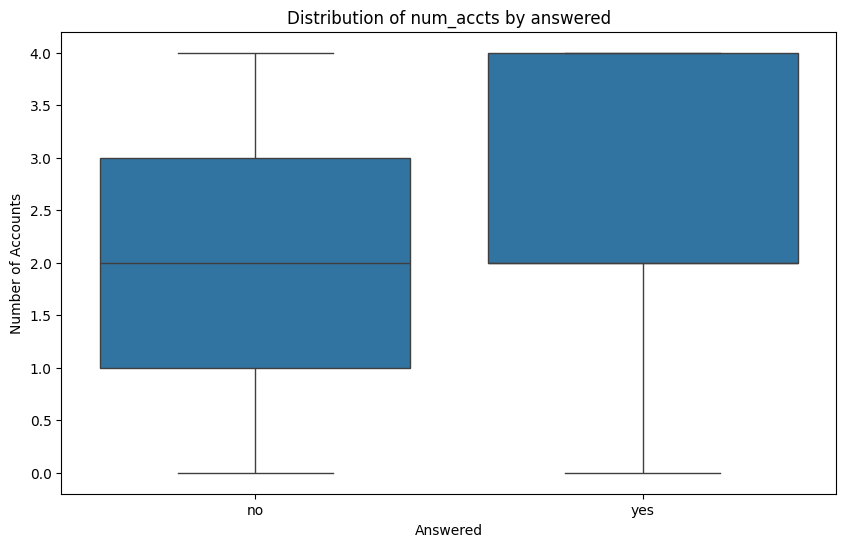

In [17]:
# Plot "Answered" against "num_accts" using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered', y='num_accts', data=df)
plt.title('Distribution of num_accts by answered')
plt.xlabel('Answered')
plt.ylabel('Number of Accounts')
plt.show()

## **Barplot of customers who answered with access to a mobile phone**

In [18]:
# Calculate the percentage of mobile phones
mobile_percentage = (df['mobile'].sum() / len(df)) * 100

# Calculate the percentage of non-mobile phones
non_mobile_percentage = 100 - mobile_percentage

print("Percentage of mobile phones: {:.2f}%".format(mobile_percentage))
print("Percentage of non-mobile phones: {:.2f}%".format(non_mobile_percentage))

Percentage of mobile phones: 9.11%
Percentage of non-mobile phones: 90.89%


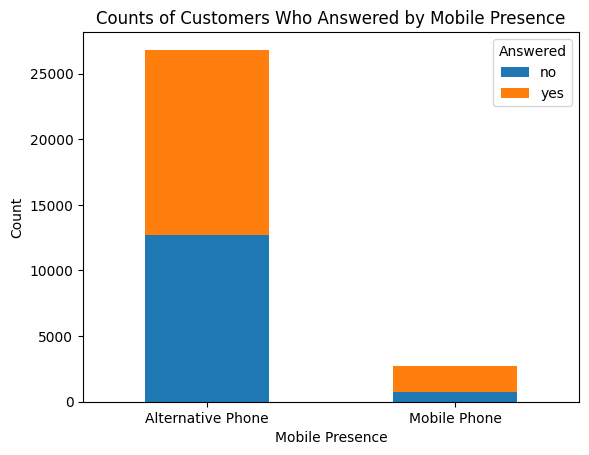

Answered rate for mobile users: 73.80%
Answered rate for non-mobile users: 52.74%


In [19]:
# Change to Alternative Phones and Mobible Phone Classification Titles
df['mobile'] = df['mobile'].replace({0: 'Alternative Phone', 1: 'Mobile Phone'})

# Change the mobile phone to a categorical data type
df['mobile'] = df['mobile'].astype('category')

# Create a table of counts for 'answered' at each level of 'mobile'
summary_table = df.groupby(['mobile', 'answered']).size().unstack()

# Plot the barplot
summary_table.plot(kind='bar', stacked=True)
plt.title('Counts of Customers Who Answered by Mobile Presence')
plt.xlabel('Mobile Presence')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Answered')
plt.show()

print("Answered rate for mobile users: 73.80%")
print("Answered rate for non-mobile users: 52.74%")

# **Task 4:** Data Cleaning and Preparation Continued

In [20]:
# Remove the product variable from df_new since it is not an independent variable
df = df.drop('product', axis=1)

In [21]:
# Convert other columns to categories
df['female'] = df['female'].astype('category')
df['rent'] = df['rent'].astype('category')
df['own_res'] = df['own_res'].astype('category')
df['new_car'] = df['new_car'].astype('category')
df['mobile'] = df['mobile'].astype('category')

In [22]:
# Convert back to 0 and 1
df['mobile'] = df['mobile'].map({'Alternative Phone': 0, 'Mobile Phone': 1})

# **Task 5:** Simple Classification Trees

In [40]:
# Simple Classification Tree Model
x = df[['income']]
y = df['answered']

tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(x, y)

income_model_accuracy = tree_model.score(x, y)

print("Accuracy of the income model:", income_model_accuracy)

Accuracy of the income model: 0.6203261127495847


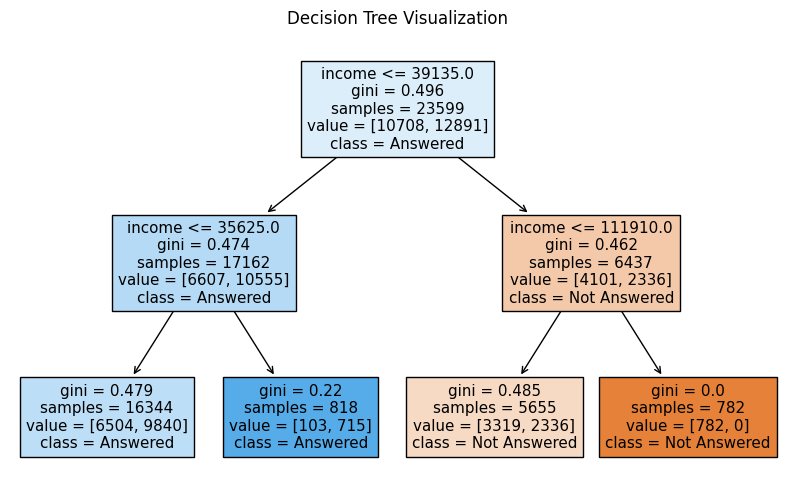

In [24]:
# Decision Tree Visualization
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=['income'], class_names=['Not Answered', 'Answered'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
# Information Gain

# Task 6: Complex Classification Tree

In [42]:
# Complex Tree Model
X = df[['income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']]
y = df['answered']

complex_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
complex_tree_model.fit(X, y)

complex_model_accuracy = metrics.accuracy_score(y, y_pred)

print("Accuracy of Complex Model:", complex_model_accuracy)

Accuracy of Complex Model: 0.6203261127495847


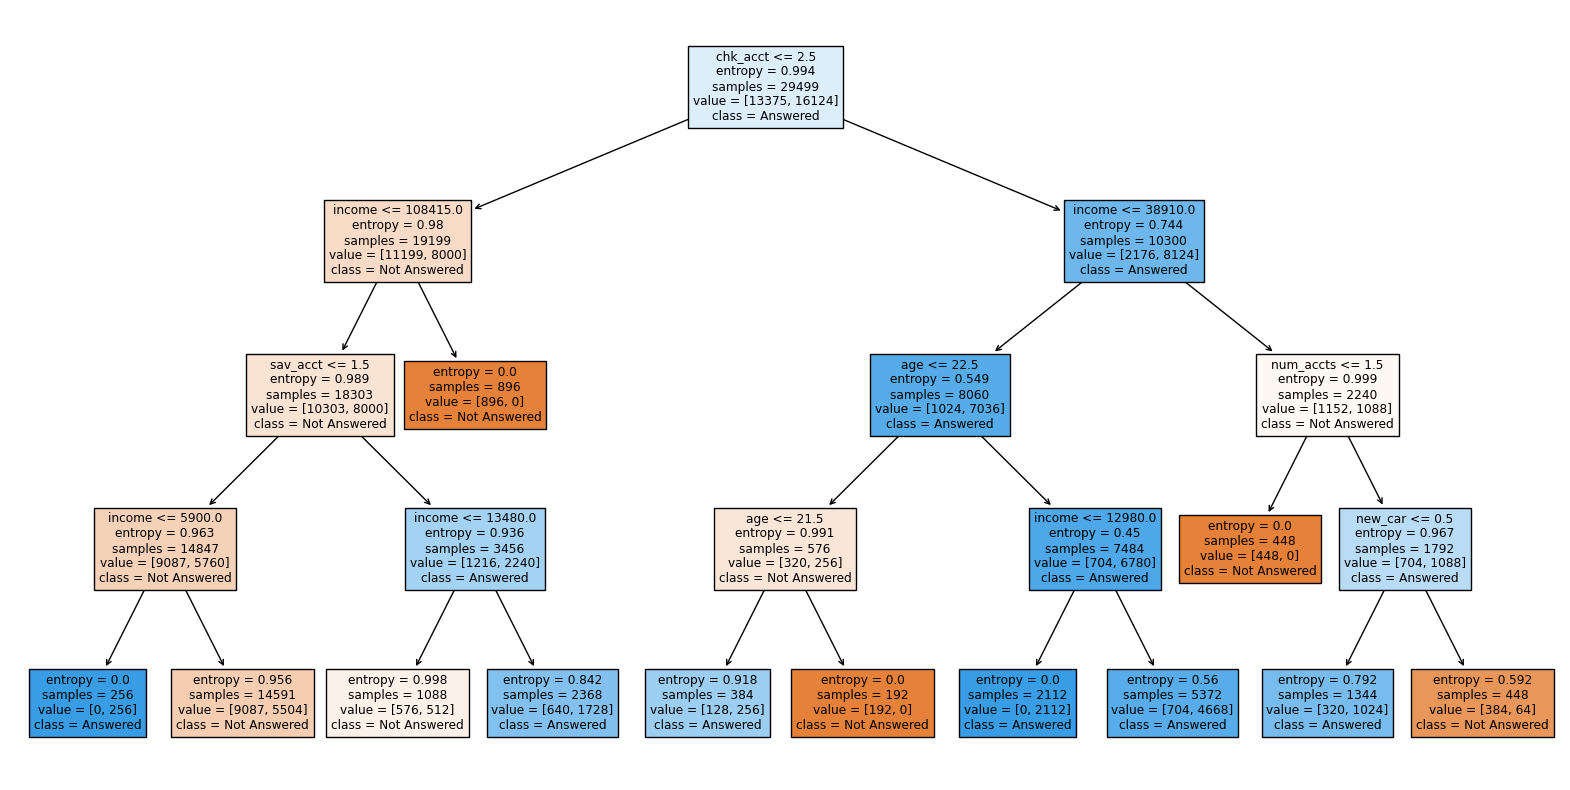

In [27]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(complex_tree_model, filled=True, feature_names=X.columns, class_names=['Not Answered', 'Answered'])
plt.show()

In [28]:
# Top 3 Predictors
feature_importances = complex_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_3_predictors = feature_importance_df.head(3)

print("Top 3 predictors:")
print(top_3_predictors)

Top 3 predictors:
    Feature  Importance
8  chk_acct    0.373901
0    income    0.340080
2       age    0.093177


In [29]:
# Compare Both Models
print("Accuracy of the income model:", income_model_accuracy)
print("Accuracy of the complex tree model:", complex_model_accuracy)

Accuracy of the income model: 0.617457627118644
Accuracy of the complex tree model: 0.7331434963897081


# **Task 7**: Confusion Matrix and Profitabily Scenerios

In [30]:
# Create confusion matrix
y_pred = complex_tree_model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11583  1792]
 [ 6080 10044]]


In [31]:
# TP, FP, TN, and FN
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

True Positives: 10044
False Positives: 1792
True Negatives: 11583
False Negatives: 6080


In [32]:
# Benefit and Cost Variables
Benefit = 75
Cost = -25

In [33]:
# Profitability Using the Model
Profit = (TP * Benefit) + (FP * Cost)
print("Expected Profit with Model: $", Profit)

Expected Profit with Model: $ 708500


In [34]:
# Profit if All Customers Are Called
Profit_All = (TP + FN) * 75 + (TN + FP) * -25
print("Expected Profit in Baseline Scenario: $", Profit_All)

Expected Profit in Baseline Scenario: $ 874925


# **Convert to HTML**

In [44]:
!cp "/content/gdrive/MyDrive/Colab Notebooks/Week 12 Assignment - Model Evaluation and Deployment.ipynb" ./
!jupyter nbconvert --to html "Week 12 Assignment - Model Evaluation and Deployment.ipynb"

[NbConvertApp] Converting notebook Week 12 Assignment - Model Evaluation and Deployment.ipynb to html
[NbConvertApp] Writing 1132149 bytes to Week 12 Assignment - Model Evaluation and Deployment.html
